In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
plt.style.use(['science'])
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 250
mpl.rcParams.update({'font.size': 8})

import matplotlib.dates as mdates

myFmt = mdates.DateFormatter('%b')

import seaborn as sns

cname = "viridis"
cmap = plt.get_cmap(cname)

In [2]:
def read_summary(file):
    df = pd.read_csv(file)
    df["time_stamp"] = pd.to_datetime(df["time_stamp"])
    df = df.groupby("time_stamp").sum()
    df = df.rolling("7D").mean()
    return df

def get_mean(baselines, column):
    deaths = np.mean([baseline[column] for baseline in baselines], axis=0)
    deaths_error = np.std([baseline[column] for baseline in baselines], axis=0) / np.sqrt(len(baselines))
    deaths_cumsum = np.mean([baseline[column].cumsum() for baseline in baselines], axis=0)
    deaths_cumsum_error = np.std([baseline[column].cumsum() for baseline in baselines], axis=0) / np.sqrt(len(baselines))
    return deaths, deaths_error, deaths_cumsum, deaths_cumsum_error


In [3]:
baseline_files = np.sort(glob("../data/baselines/summary*.csv"))
baseline_summaries = [read_summary(f) for f in baseline_files]

In [4]:
social_distancing_files  = np.sort(glob("../data/school_social_distancing/summary*.csv"))[::-1]
social_distancing_summaries = [read_summary(f) for f in social_distancing_files]

In [5]:
quarantine_files = np.sort(glob("../data/school_quarantine/summary*.csv"))
quarantine_summaries = [read_summary(f) for f in quarantine_files]

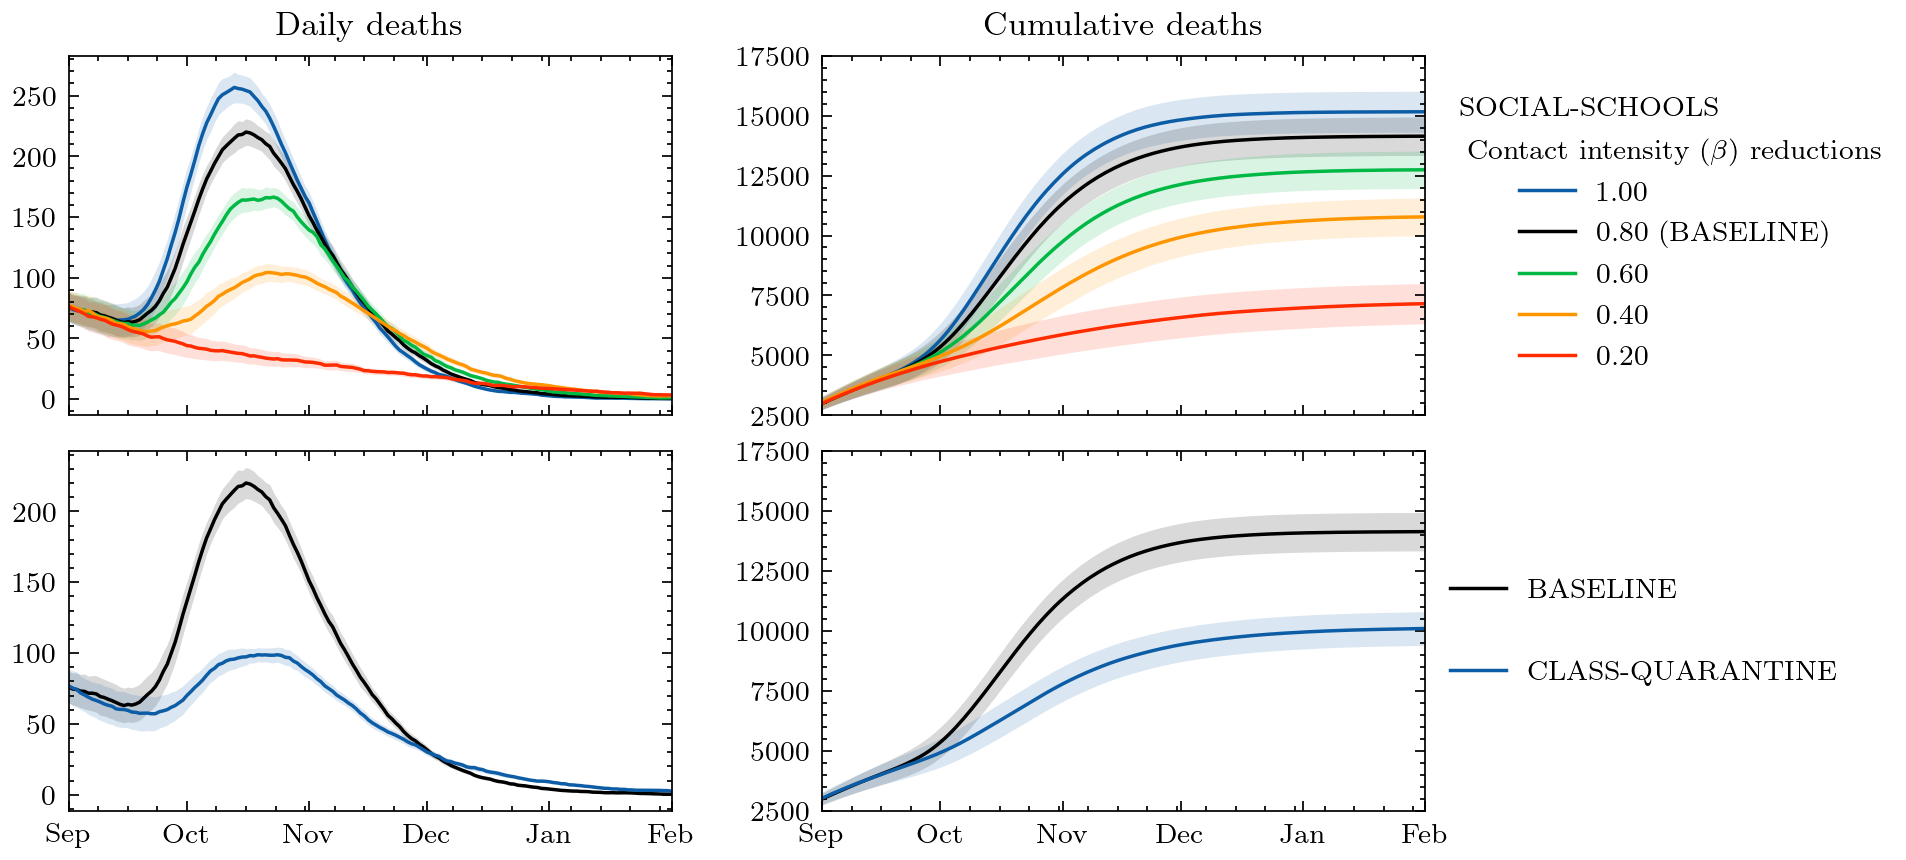

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(7,4), sharex=True)

number_variations = len(baseline_summaries)

# Baselines
bdeaths, berror, bdeaths_cumsum, berror_cumsum = get_mean(baseline_summaries, "daily_deaths")

alpha = 0.15


# Social distancing
labels = np.array([1.0, 0.8, 0.6, 0.4, 0.2])
colors = [f"C{i}" for i in range(len(labels))]

def get_label(i):
    return f"{labels[i]:.2f}"


deaths, error, deaths_cumsum, error_cumsum = get_mean(social_distancing_summaries[0:0+8], "daily_deaths")
ax[0,0].plot(social_distancing_summaries[0].index, deaths, label = get_label(0), color = colors[0])
ax[0,0].fill_between(social_distancing_summaries[0].index, deaths - error, deaths+error, color = colors[0], alpha=alpha, linewidth=0)
ax[0,1].plot(social_distancing_summaries[0].index, deaths_cumsum, label = get_label(0), color = colors[0])
ax[0,1].fill_between(social_distancing_summaries[0].index, deaths_cumsum - error_cumsum, deaths_cumsum + error_cumsum, color = colors[0], alpha=alpha, linewidth=0)


ax[0,0].plot(baseline_summaries[0].index, bdeaths, label = get_label(1)+ " (BASELINE)", color = "black")
ax[0,0].fill_between(baseline_summaries[0].index, bdeaths - berror, bdeaths+berror, color = "black", alpha=alpha, linewidth=0)
ax[0,1].plot(baseline_summaries[0].index, bdeaths.cumsum(), label = get_label(1)+ " (BASELINE)", color = "black")
ax[0,1].fill_between(baseline_summaries[0].index, bdeaths_cumsum - berror_cumsum, bdeaths_cumsum + berror_cumsum, color = "black", alpha=alpha, linewidth=0)

for i in range(2,5):
    deaths, error, deaths_cumsum, error_cumsum = get_mean(social_distancing_summaries[8*i:8*(i+1)], "daily_deaths")
    ax[0,0].plot(social_distancing_summaries[0].index, deaths, label = get_label(i), color = colors[i-1])
    ax[0,0].fill_between(social_distancing_summaries[0].index, deaths - error, deaths+error, color = colors[i-1], alpha=alpha, linewidth=0)
    ax[0,1].plot(social_distancing_summaries[0].index, deaths_cumsum, label = get_label(i), color = colors[i-1])
    ax[0,1].fill_between(social_distancing_summaries[0].index, deaths_cumsum - error_cumsum, deaths_cumsum + error_cumsum, color = colors[i-1], alpha=alpha, linewidth=0)


ax[0,1].text(pd.to_datetime("2022-02-10"), 15000, "SOCIAL-SCHOOLS")
ax[0,1].legend(loc="center left", bbox_to_anchor=(1.03,0.45), title= r"Contact intensity ($\beta$) reductions")

# School quarantine

ax[1,0].plot(baseline_summaries[0].index, bdeaths, label = "BASELINE", color = "black")
ax[1,0].fill_between(baseline_summaries[0].index, bdeaths - berror, bdeaths+berror, color = "black", alpha=alpha, linewidth=0)
ax[1,1].plot(baseline_summaries[0].index, bdeaths.cumsum(), label = "BASELINE", color = "black")
ax[1,1].fill_between(baseline_summaries[0].index, bdeaths_cumsum - berror_cumsum, bdeaths_cumsum+berror_cumsum, color = "black", alpha=alpha, linewidth=0)

deaths, error, deaths_cumsum, error_cumsum = get_mean(quarantine_summaries, "daily_deaths")
ax[1,0].plot(quarantine_summaries[0].index, deaths, label = "CLASS-QUARANTINE", color = "C0")
ax[1,0].fill_between(quarantine_summaries[0].index, deaths - error, deaths+error, color = "C0", alpha=alpha, linewidth=0)
ax[1,1].plot(quarantine_summaries[0].index, deaths.cumsum(), label = "CLASS-QUARANTINE", color = "C0")
ax[1,1].fill_between(quarantine_summaries[0].index, deaths_cumsum - error_cumsum, deaths_cumsum + error_cumsum, color = "C0", alpha=alpha, linewidth=0)


#
ax[1,1].legend(loc="center left", bbox_to_anchor=(1,0.5), labelspacing=2)
#
######

ax[0,0].xaxis.set_major_formatter(myFmt)
ax[1, 0].set_xlim(pd.to_datetime("2021-09-01"), pd.to_datetime("2022-02-01"))
ax[0,1].set_ylim(2500, 17500)
ax[1,1].set_ylim(2500, 17500)


ax[0,0].set_title("Daily deaths")
ax[0,1].set_title("Cumulative deaths")


plt.subplots_adjust(wspace=0.25, hspace=0.1)
fig.savefig("../figures/Fig2_npi.pdf")